<a href="https://colab.research.google.com/github/Filip180200/Data-Science/blob/main/Eksploracja_Danych.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalowanie pakietów

In [ ]:
pip install matplotlib

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from matplotlib.ticker import FuncFormatter
from datetime import datetime

Wczytanie bazy danych

In [ ]:
file_path = '/content/drive/MyDrive/Data Science/cleaned_data.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

Funckcje

In [ ]:
# Szukanie poprawnych miejsc na wykresie

def find_position(data, value):
    for x in range(len(data)):
        if data[x] == value:
            return x
    return None

Liczenie

In [ ]:
# Count the occurrences of each unique value in the 'Category' column
app_counts = df['App'].value_counts()
category_counts = df['Category'].value_counts()
rating_counts = df['Rating'].value_counts()
reviews_counts = df['Reviews'].value_counts()
size_counts = df['Size'].value_counts()
installs_counts = df['Installs'].value_counts()
type_counts = df['Type'].value_counts()
price_counts = df['Price'].value_counts()
content_rating_counts = df['Content Rating'].value_counts()
genres_counts = df['Genres'].value_counts()
last_updated_counts = df['Last Updated'].value_counts()
current_counts = df['Current Ver'].value_counts()
android_counts = df['Android Ver'].value_counts()



*   Zaokronglanie



In [ ]:
# Round the 'Rating' column to whole numbers
df['Rating_Round'] = df['Rating'].round()

# Count the occurrences of each unique rounded rating value
rating_counts_rounded = df['Rating_Round'].value_counts()



*   median and quantiles - Reviews



In [ ]:
percentiles = [10, 25, 50, 75, 90]
percentile_ranges = [(0, 10), (10, 25), (25, 50), (50, 75), (75, 90), (90, 100)]

counts_within_percentile_ranges = []

xtick_labels = []  # Initialize xtick labels

for percentile_range in percentile_ranges:
    min_val = df['Reviews'].quantile(percentile_range[0] / 100)
    max_val = df['Reviews'].quantile(percentile_range[1] / 100)

    count_within_range = ((df['Reviews'] >= min_val) & (df['Reviews'] < max_val)).sum()
    counts_within_percentile_ranges.append(count_within_range)

    # Create xtick labels for each percentile range
    xtick_labels.append(f'{min_val:.0f} - {max_val:.0f}')

Wykresy:



---



*   App name



In [ ]:
# Specify the number of top apps you want to include in the output
top_n = 10

# Create a formatted string for the output
output_string = f'In this date we have {len(app_counts)} apps.\n'
output_string += f'{top_n} most common apps are: '

# Iterate through the top_n apps and add them to the output
for i in range(top_n):
    app_name = app_counts.index[i]
    app_count = app_counts.values[i]
    output_string += f'{app_name} - {app_count}, '

output_string = output_string[:-2]
output_string += '\n'

print(output_string)


In this date we have 7023 apps.
10 most common apps are: ROBLOX - 9, Candy Crush Saga - 7, 8 Ball Pool - 7, Subway Surfers - 6, Temple Run 2 - 6, Helix Jump - 6, Nick - 6, Zombie Catchers - 6, Bubble Shooter - 6, Plants vs. Zombies FREE - 5





---



*   Category


In this date we have 33 category. Names of it are below in graph.
5 most common categories are: FAMILY - 1616, GAME - 974, TOOLS - 633, MEDICAL - 324, LIFESTYLE - 280



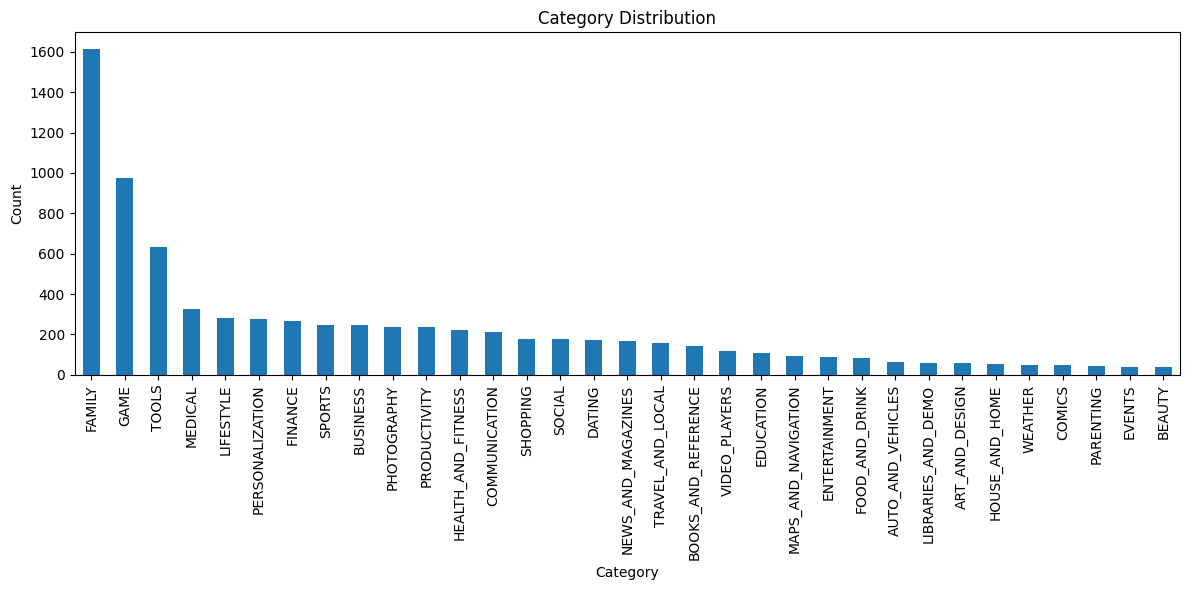

In [ ]:
# Specify the number of top categories you want to include in the output
top_n = 5

# Create a formatted string for the output
output_string = f'In this date we have {len(category_counts)} category. Names of it are below in graph.\n'
output_string += f'{top_n} most common categories are: '

# Iterate through the top_n categories and add them to the output
for i in range(top_n):
    category_name = category_counts.index[i]
    category_count = category_counts.values[i]
    output_string += f'{category_name} - {category_count}, '

output_string = output_string[:-2]  # Remove the trailing comma and space
output_string += '\n'

print(output_string)

# Create a bar graph
plt.figure(figsize=(12, 6))  # Set the size of the figure
category_counts.plot(kind='bar')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()




---




*   Rating





In this date we have grade range from 5.0 to 1.0. 
 Mediane are: 4.3. Is on red on plot. 
 First quartile is 4.0, and third quartile is 4.5. Are on green on plot


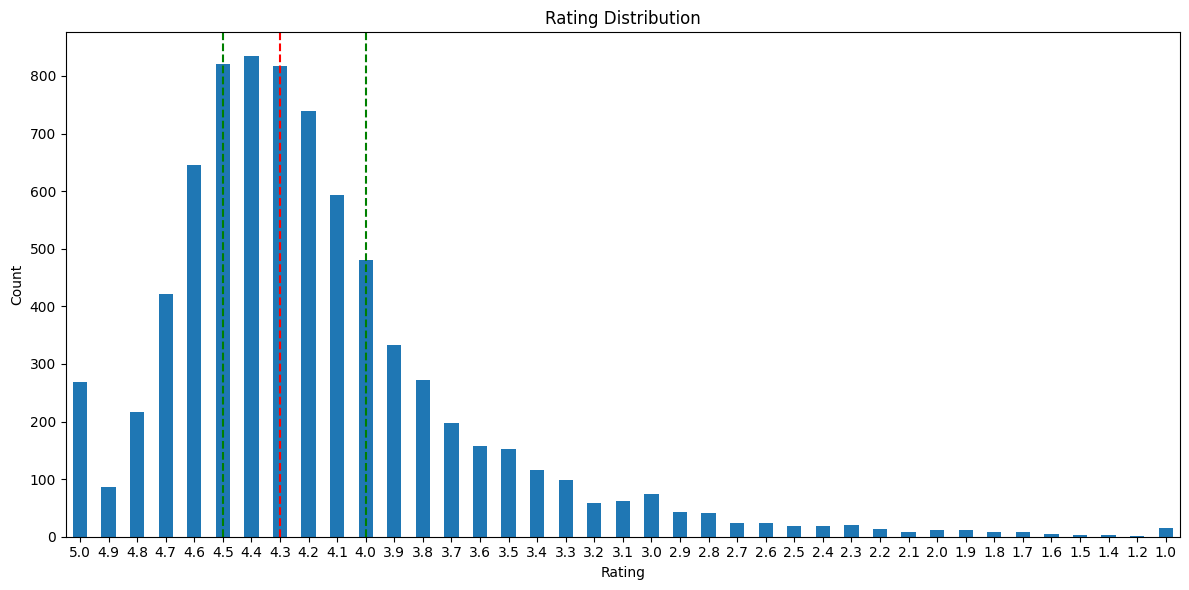

In [ ]:
# Sort the DataFrame by the 'Rating' column
rating_counts = rating_counts.sort_index(ascending=False)

q1 = np.percentile(df['Rating'].values, 25)
median = np.percentile(df['Rating'].values, 50)
q3 = np.percentile(df['Rating'].values, 75)

print(f'In this date we have grade range from {rating_counts.index[0]} to {rating_counts.index[-1]}. \n Mediane are: {median}. Is on red on plot. \n First quartile is {q1}, and third quartile is {q3}. Are on green on plot')

# Create a bar graph
plt.figure(figsize=(12, 6))  # Set the size of the figure
rating_counts.plot(kind='bar')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')

plt.axvline(find_position(rating_counts.index, q1), color='green', linestyle='--')
plt.axvline(find_position(rating_counts.index, median), color='red', linestyle='--')
plt.axvline(find_position(rating_counts.index, q3), color='green', linestyle='--')


plt.xticks(rotation=0)  # Rotate x-axis labels for better readability if needed

plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()


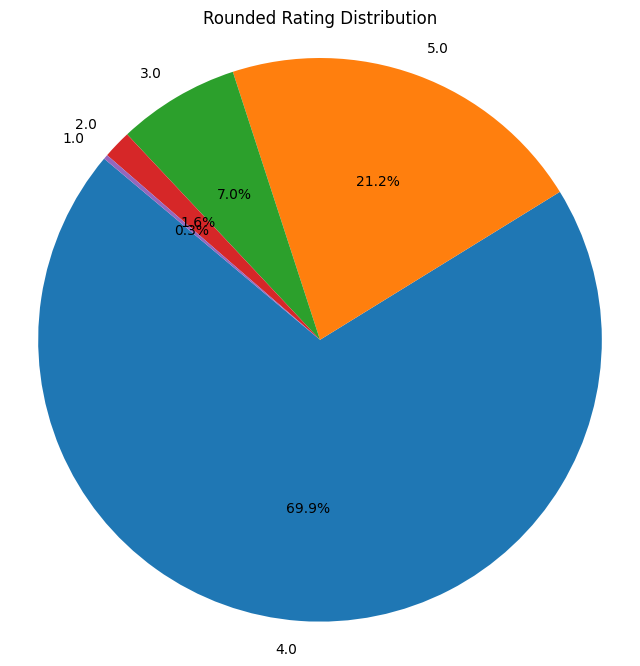

In [ ]:
# Create a pie chart
plt.figure(figsize=(8, 8))  # Set the size of the figure
plt.pie(rating_counts_rounded, labels=rating_counts_rounded.index, autopct='%1.1f%%', startangle=140)
plt.title('Rounded Rating Distribution')


plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.


plt.show()




---


*   Reviews



In this date we have grade range from 2 to 398307. 
 Mediane are: 2332.0. Is on red on plot. 
 First quartile is 107.5, and third quartile is 39053.0.


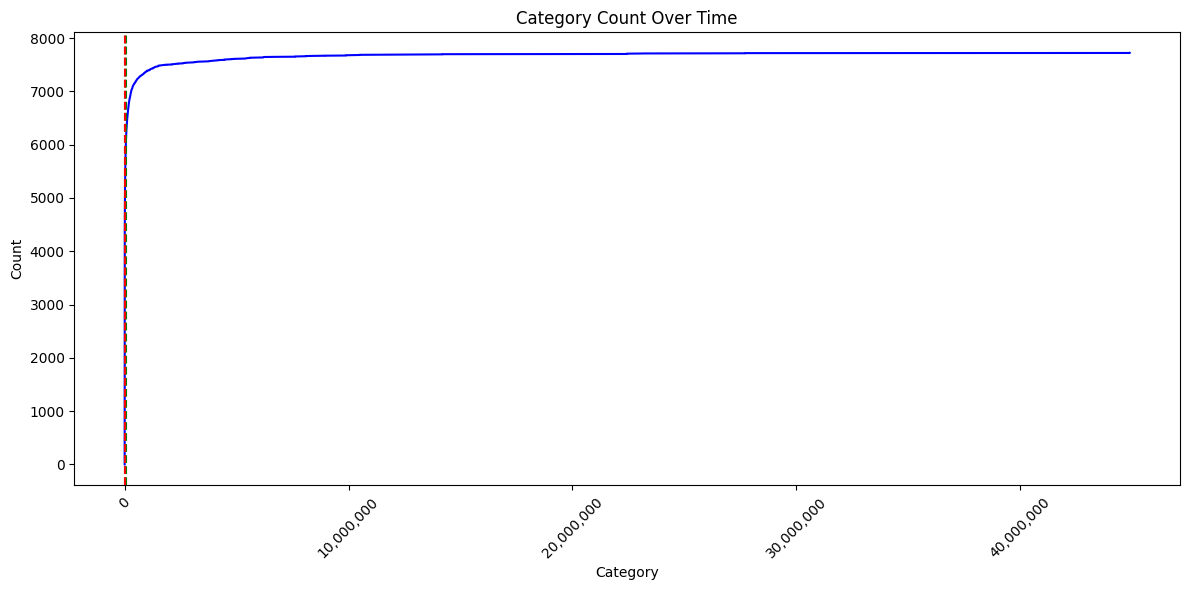

In [ ]:
# Sort the DataFrame by the 'Size' column
df = df.sort_values(by="Reviews", ascending=True).reset_index(drop=True)

q1 = np.percentile(df['Reviews'].values, 25)
median = np.percentile(df['Reviews'].values, 50)
q3 = np.percentile(df['Reviews'].values, 75)

# Info
print(f'In this date we have grade range from {reviews_counts.index[0]} to {reviews_counts.index[-1]}. \n Mediane are: {median}. Is on red on plot. \n First quartile is {q1}, and third quartile is {q3}.')

# Create a line graph
plt.figure(figsize=(12, 6))  # Set the size of the figure
plt.plot(df['Reviews'], df['Reviews'].index, linestyle='-', color='b', label='Count')
plt.title('Category Count Over Time')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)


plt.axvline((reviews_counts.values, q1)[1], color='green', linestyle='--')
plt.axvline((reviews_counts.values, q3)[1], color='green', linestyle='--')
plt.axvline((reviews_counts.values, median)[1], color='red', linestyle='--')


# Apply custom formatting to y-axis ticks
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))


plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()

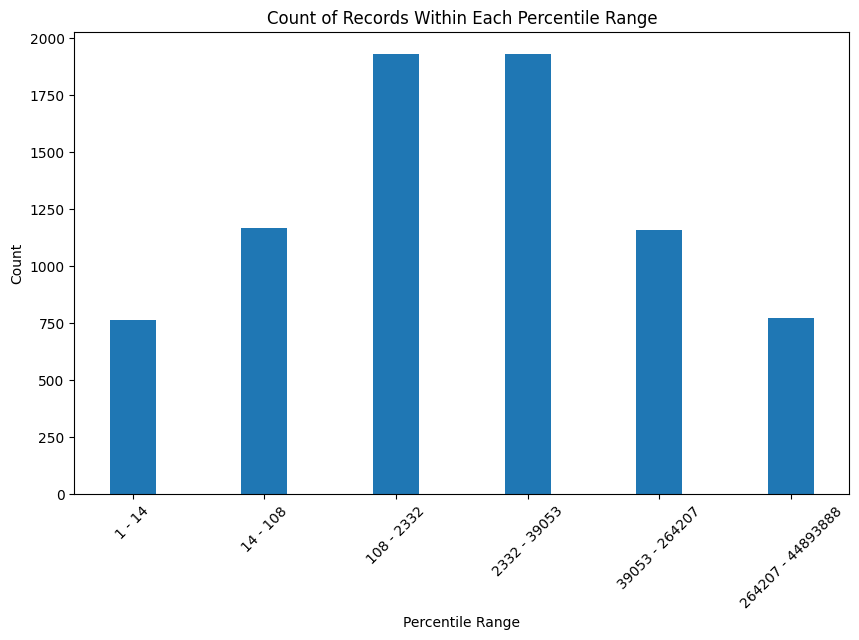

In [ ]:
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(percentile_ranges))

plt.bar(index, counts_within_percentile_ranges, bar_width, label='Counts within Percentile Ranges')
plt.xlabel('Percentile Range')
plt.ylabel('Count')
plt.title('Count of Records Within Each Percentile Range')
plt.xticks(index, xtick_labels, rotation=45)

plt.show()



---



*   Size

In this date we have grade range from 2 to 398307. 
 Mediane are: 14000000.0. Is on red on plot. 
 First quartile is 5300000.0, and third quartile is 33000000.0. They are on green in plot below.



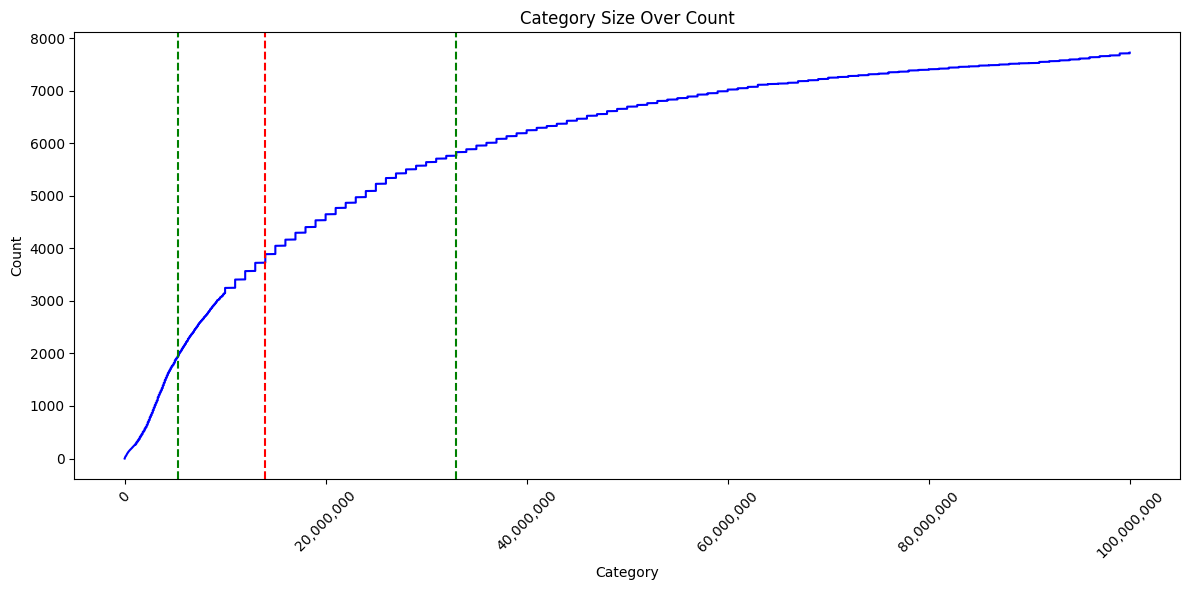

In [ ]:
# Sort the DataFrame by the 'Size' column
df = df.sort_values(by="Size", ascending=True).reset_index(drop=True)

q1 = np.percentile(df['Size'].values, 25)
median = np.percentile(df['Size'].values, 50)
q3 = np.percentile(df['Size'].values, 75)

# Info
print(f'In this date we have grade range from {reviews_counts.index[0]} to {reviews_counts.index[-1]}. \n Mediane are: {median}. Is on red on plot. \n First quartile is {q1}, and third quartile is {q3}. They are on green in plot below.\n')

# Create a line graph
plt.figure(figsize=(12, 6))  # Set the size of the figure
plt.plot(df['Size'], df['Size'].index, linestyle='-', color='b', label='Count')
plt.title('Category Size Over Count')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.axvline((reviews_counts.values, q1)[1], color='green', linestyle='--')
plt.axvline((reviews_counts.values, q3)[1], color='green', linestyle='--')
plt.axvline((reviews_counts.values, median)[1], color='red', linestyle='--')

# Apply custom formatting to y-axis ticks
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))


plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()



---


Installs

In [ ]:
df['Installs'] = df['Installs'].str.replace(',', '', regex=True)

In this date we have grade range from 1000000 to 1. 
 Mediane are: 3861.0. Is on red on plot. 
 First quartile is 1930.5, and third quartile is 5791.5.



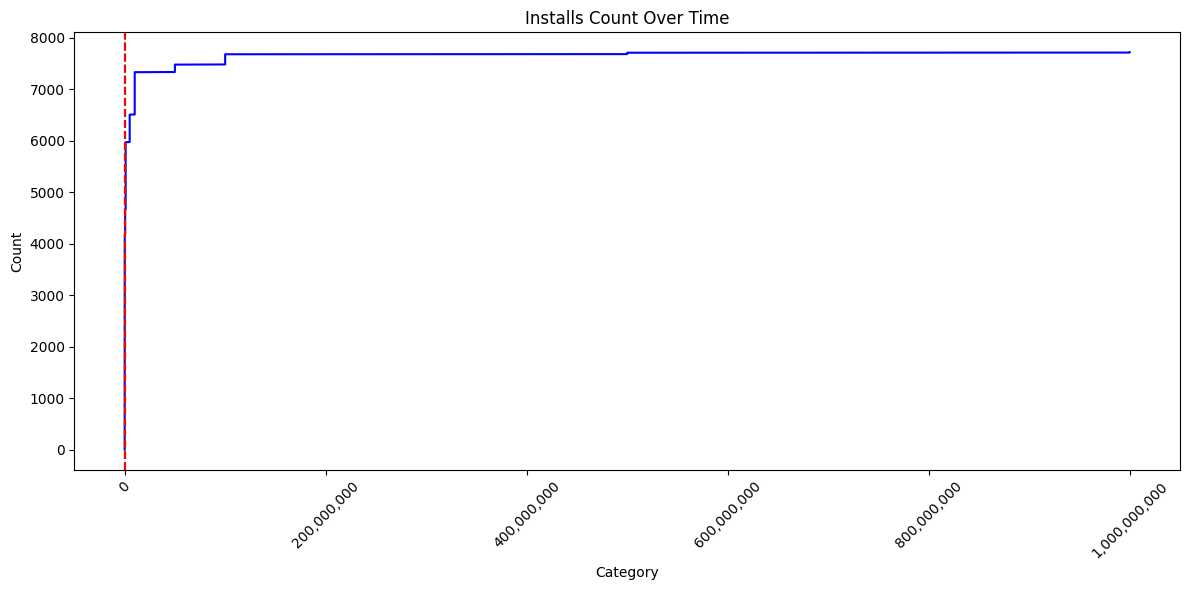

In [ ]:
# Sort the DataFrame by the 'Installs' column
df['Installs'] = df['Installs'].astype(int)
df = df.sort_values(by="Installs", ascending=True).reset_index(drop=True)

q1 = np.percentile(df['Installs'].index, 25)
median = np.percentile(df['Installs'].index, 50)
q3 = np.percentile(df['Installs'].index, 75)

# Info
print(f'In this date we have grade range from {installs_counts.index[0]} to {installs_counts.index[-1]}. \n Mediane are: {median}. Is on red on plot. \n First quartile is {q1}, and third quartile is {q3}.\n')

# Label generate
installs_label = pd.to_numeric(installs_counts.index, errors='coerce', downcast='integer')

# Create a line graph
plt.figure(figsize=(12, 6))  # Set the size of the figure
plt.plot(df['Installs'], df['Installs'].index, linestyle='-', color='b', label='Count')
plt.title('Installs Count Over Time')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.axvline((installs_counts.values, q1)[1], color='green', linestyle='--')
plt.axvline((installs_counts.values, q3)[1], color='green', linestyle='--')
plt.axvline((installs_counts.values, median)[1], color='red', linestyle='--')

# Apply custom formatting to y-axis ticks
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.tight_layout()
plt.show()

Type

In this date we have 2 types of date. They are: Free, Paid.



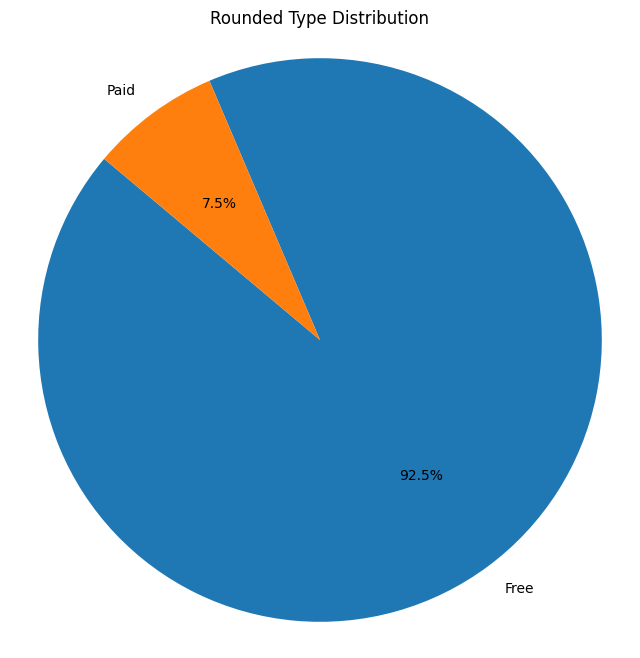

In [ ]:
print(f'In this date we have {len(type_counts)} types of date. They are: {type_counts.index[0]}, {type_counts.index[1]}.\n')

# Create a pie chart
plt.figure(figsize=(8, 8))  # Set the size of the figure
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Rounded Type Distribution')

plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

plt.show()



---


Price

In this date we have 68 price ranges.
7 most common apps are: $0.0 - 7146, $0.99 - 105, $2.99 - 101, $4.99 - 63, $1.99 - 53, $3.99 - 45, $1.49 - 27
Mediane are: 0.0. Is on red on plot. 
First quartile is 0.0, and third quartile is 0.0.



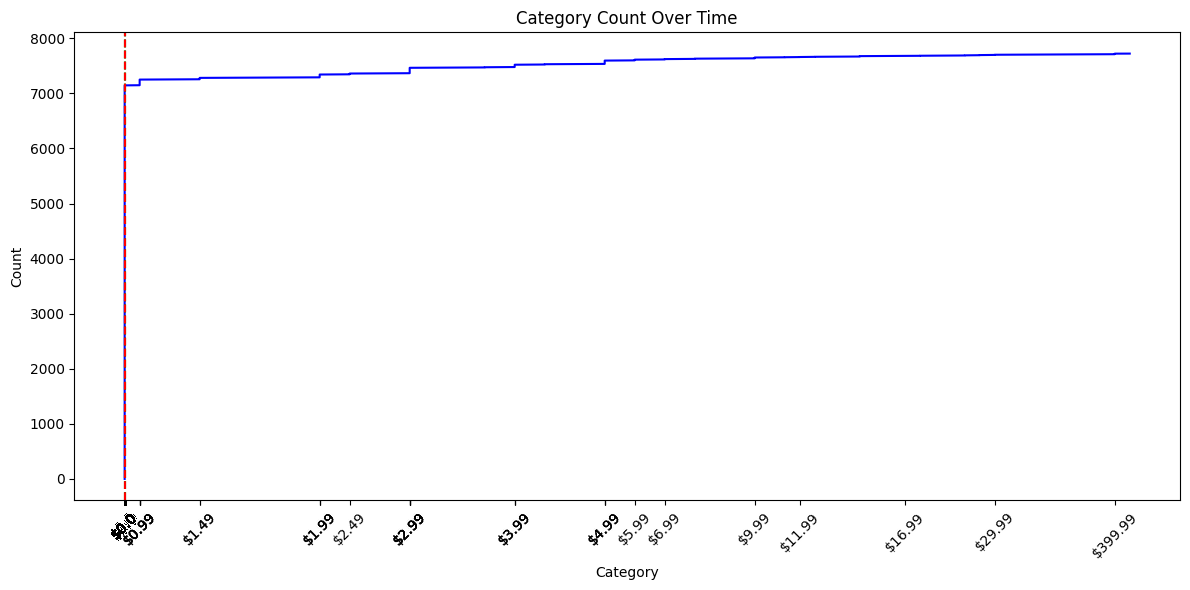

In [ ]:
# Sort the DataFrame by the 'Installs' column
df = df.sort_values(by="Price", ascending=True).reset_index(drop=True)

q1 = np.percentile(df['Price'].values, 25)
median = np.percentile(df['Price'].values, 50)
q3 = np.percentile(df['Price'].values, 75)

df['Price'] = '$' + df['Price'].astype(str)

# You can convert it to a dictionary for easier iteration
price_dict = price_counts.to_dict()

# Specify the number of top apps you want to include in the output
top_n = 7

# Create a formatted string for the output
output_string = f'In this date we have {len(price_counts)} price ranges.\n'
output_string += f'{top_n} most common apps are: '

# Iterate through the top_n apps and add them to the output
for i in range(top_n):
    price_name = price_counts.index[i]
    price_count = price_counts.values[i]
    output_string += f'${price_name} - {price_count}, '

output_string = output_string[:-2]  # Remove the trailing comma and space
output_string += '\n'
output_string += f'Mediane are: {median}. Is on red on plot. \nFirst quartile is {q1}, and third quartile is {q3}.\n'

print(output_string)

# Create a line graph
plt.figure(figsize=(12, 6))  # Set the size of the figure
plt.plot(df['Price'], df['Price'].index, linestyle='-', color='b', label='Count')
plt.title('Category Count Over Time')
plt.xlabel('Category')
plt.ylabel('Count')

plt.axvline((price_counts.values, q1)[1], color='green', linestyle='--')
plt.axvline((price_counts.values, q3)[1], color='green', linestyle='--')
plt.axvline((price_counts.values, median)[1], color='red', linestyle='--')

plt.xticks(df['Price'][::20], df['Price'][::20], rotation=45)

plt.tight_layout()
plt.show()

Rating

In this date we have 6 types of date. 
They are: Everyone - 6166, Teen - 868, Mature 17+ - 368, Everyone 10+ - 318, Adults only 18+ - 2, Unrated - 1


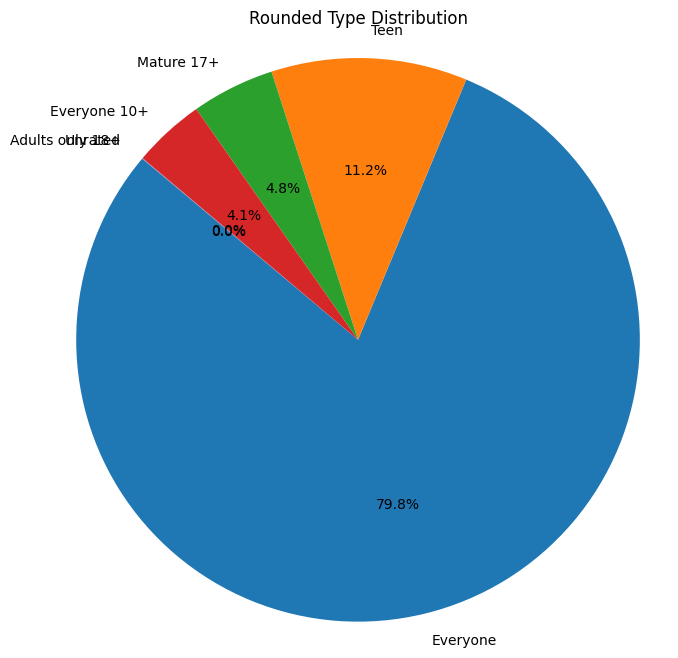

In [ ]:
# You can convert it to a dictionary for easier iteration
content_rating_dict = content_rating_counts.to_dict()

# Create a formatted string for the output
output_string = f'In this date we have {len(content_rating_counts)} types of date. \nThey are: '
output_string += ', '.join(f'{name} - {count}' for name, count in content_rating_dict.items())
print(output_string)

# Create a pie chart
plt.figure(figsize=(8, 8))  # Set the size of the figure
plt.pie(content_rating_counts, labels=content_rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Rounded Type Distribution')

plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

plt.show()

Genereses

*   All



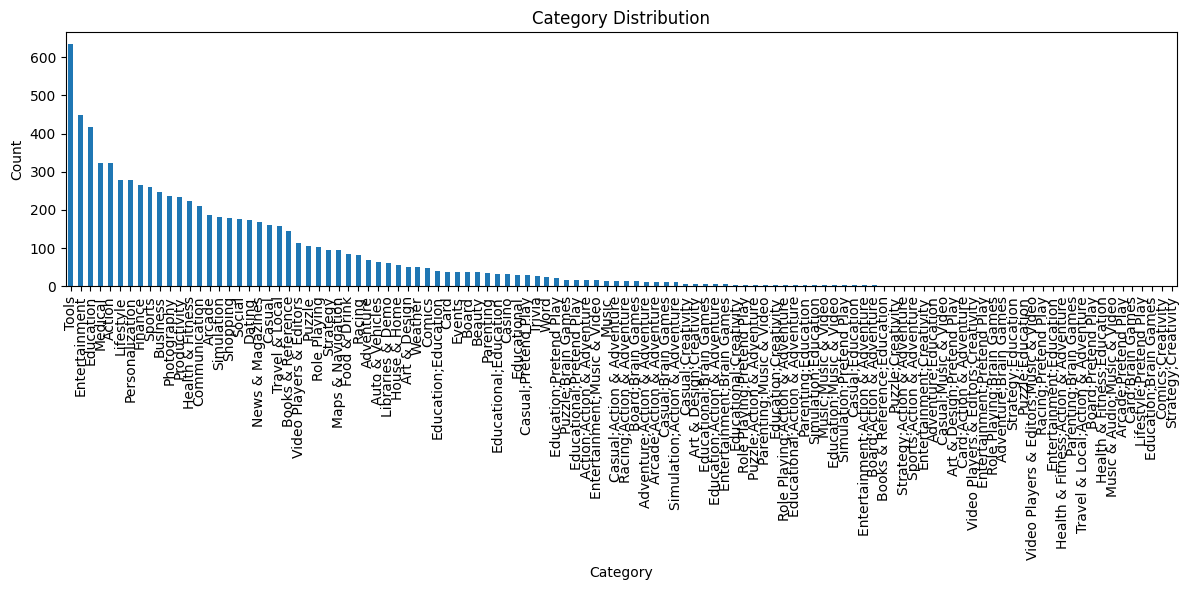

In [ ]:
# Create a bar graph
plt.figure(figsize=(12, 6))  # Set the size of the figure
genres_counts.plot(kind='bar')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed

plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()



*   Lower than 10



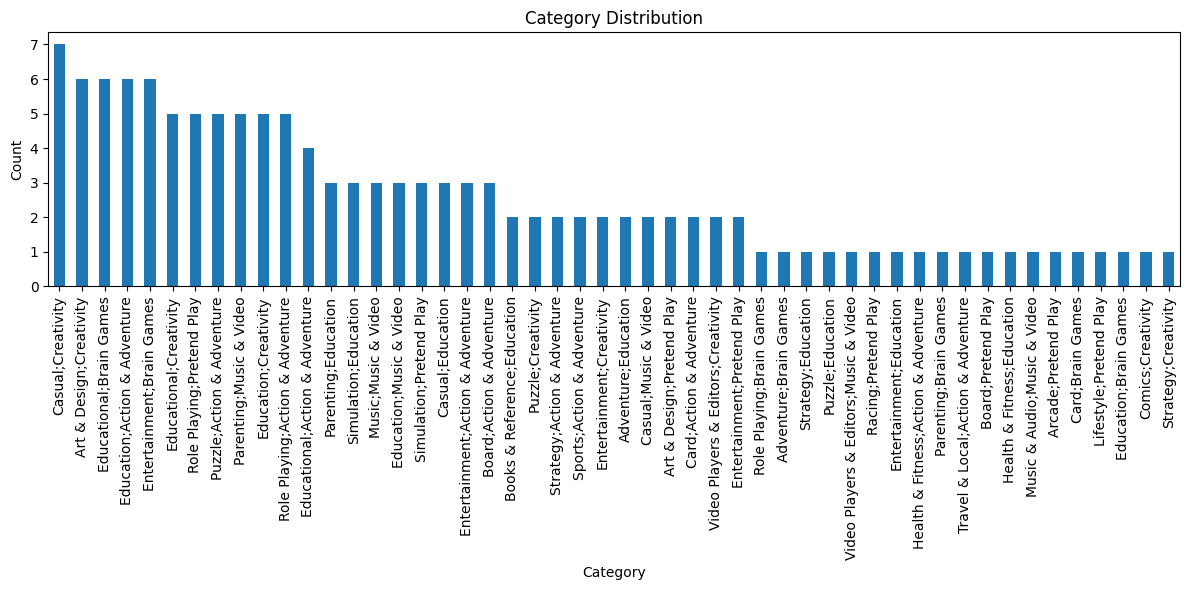

In [ ]:
# Filter genres with counts lower than 10
filtered_genres_counts = genres_counts[genres_counts < 10]

# Create a bar graph
plt.figure(figsize=(12, 6))  # Set the size of the figure
filtered_genres_counts.plot(kind='bar')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed

plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()



*   More than 10



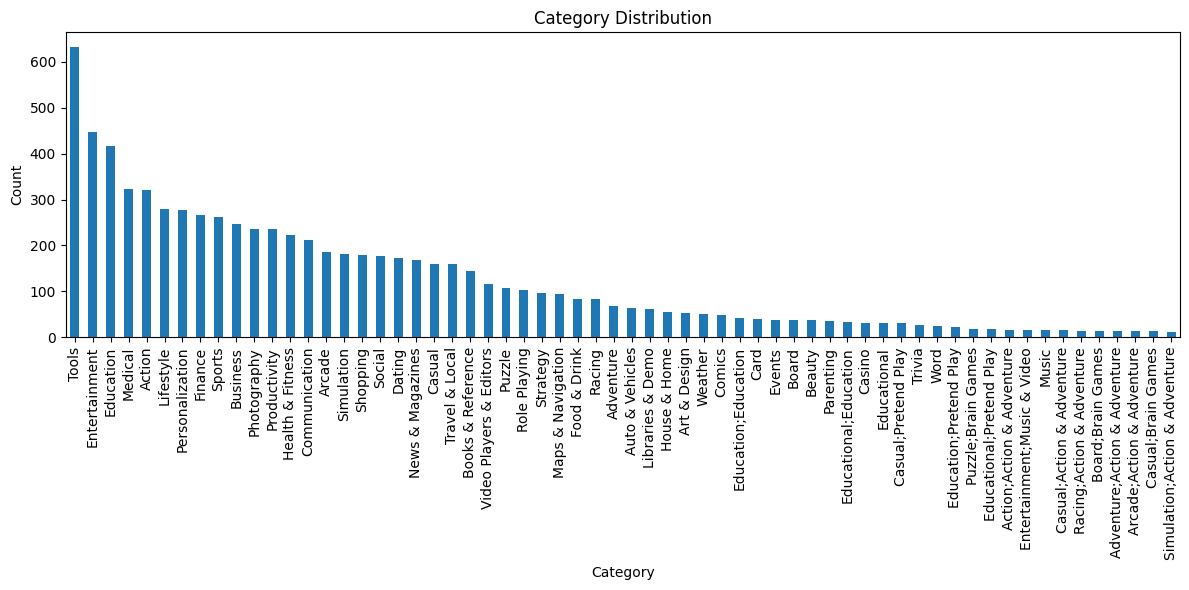

In [ ]:
# Filter genres with counts greater than or equal to 10
filtered_genres_counts = genres_counts[genres_counts >= 10]

# Create a bar graph
plt.figure(figsize=(12, 6))  # Set the size of the figure
filtered_genres_counts.plot(kind='bar')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed

plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()



*   More than 50



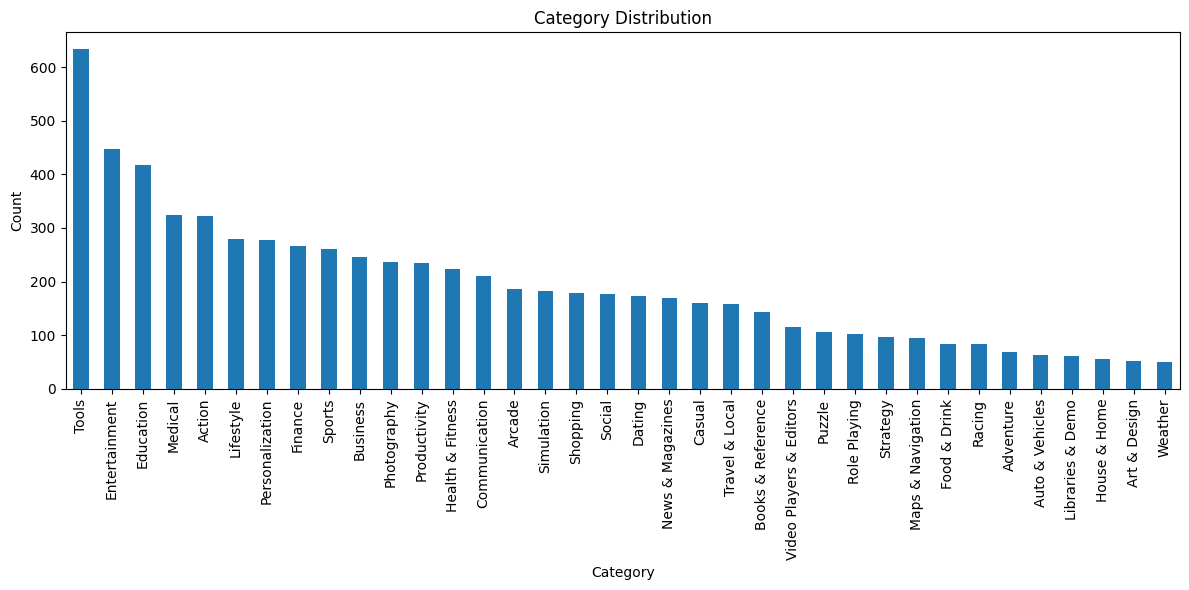

In [ ]:
# Filter genres with counts greater than or equal to 50
filtered_genres_counts = genres_counts[genres_counts >= 50]

# Create a bar graph
plt.figure(figsize=(12, 6))  # Set the size of the figure
filtered_genres_counts.plot(kind='bar')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed

plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()



*   More than 200


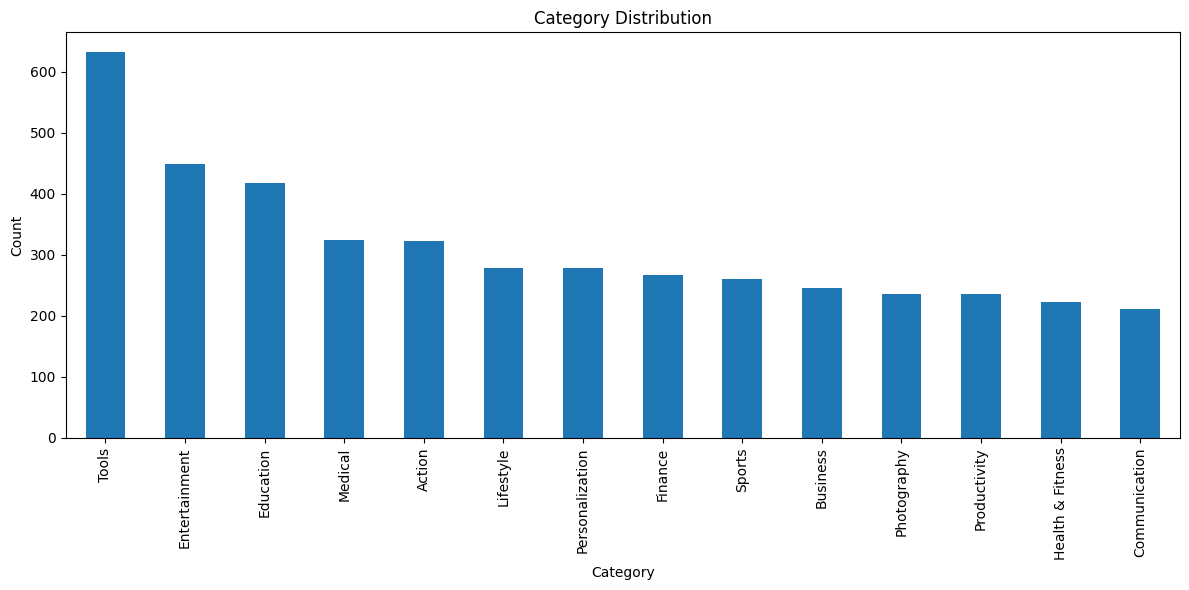

In [ ]:
# Filter genres with counts greater than or equal to 200
filtered_genres_counts = genres_counts[genres_counts >= 200]

# Create a bar graph
plt.figure(figsize=(12, 6))  # Set the size of the figure
filtered_genres_counts.plot(kind='bar')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed

plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()

Last Updated



*   By months and years


In [ ]:
# Group by year and month
last_updated_by_year_month = df.groupby([df['Last Updated'].dt.year, df['Last Updated'].dt.month])

# You can then perform various operations on each group, for example, count the occurrences of each year-month pair:
last_updated_by_year_month_counts = last_updated_by_year_month.size()

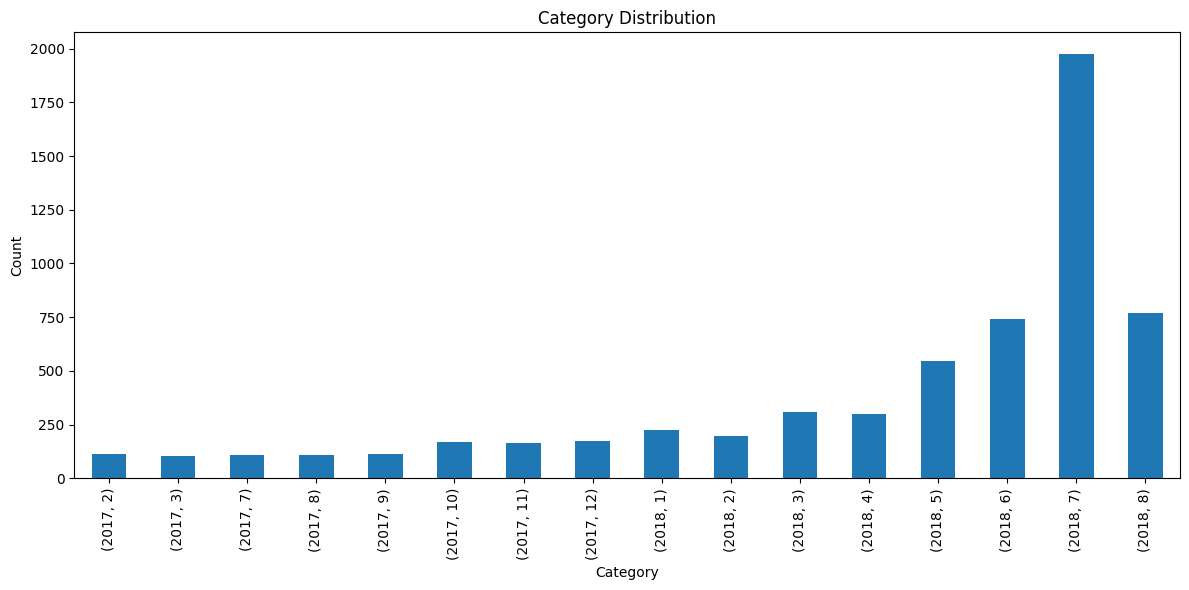

In [ ]:
filtered_last_updated_by_year_month_counts = last_updated_by_year_month_counts[last_updated_by_year_month_counts >= 100]

# Create a bar graph
plt.figure(figsize=(12, 6))  # Set the size of the figure
filtered_last_updated_by_year_month_counts.plot(kind='bar')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed

plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()



*   By Years



In [ ]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

# Now, you can group by year
last_updated_by_year = df.groupby(df['Last Updated'].dt.year)

# You can then perform various operations on each group, for example, count the occurrences of each year:
last_updated_by_year_counts = last_updated_by_year.size()

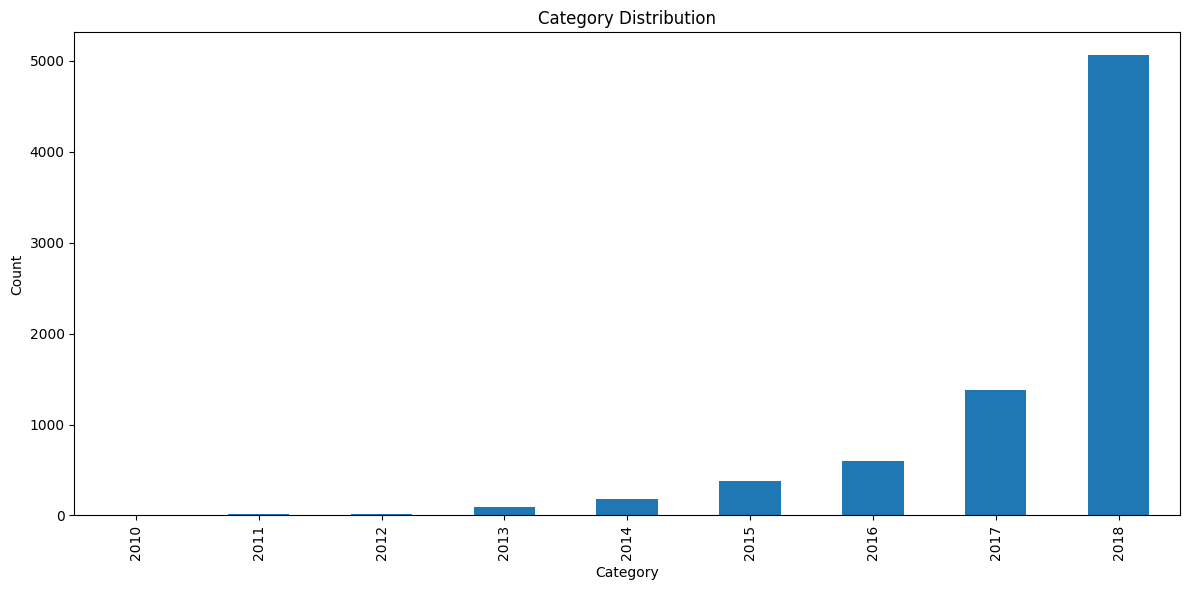

In [ ]:
# Create a bar graph
plt.figure(figsize=(12, 6))  # Set the size of the figure
last_updated_by_year_counts.plot(kind='bar')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed

plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()

Current Version



*   Counts more than 10


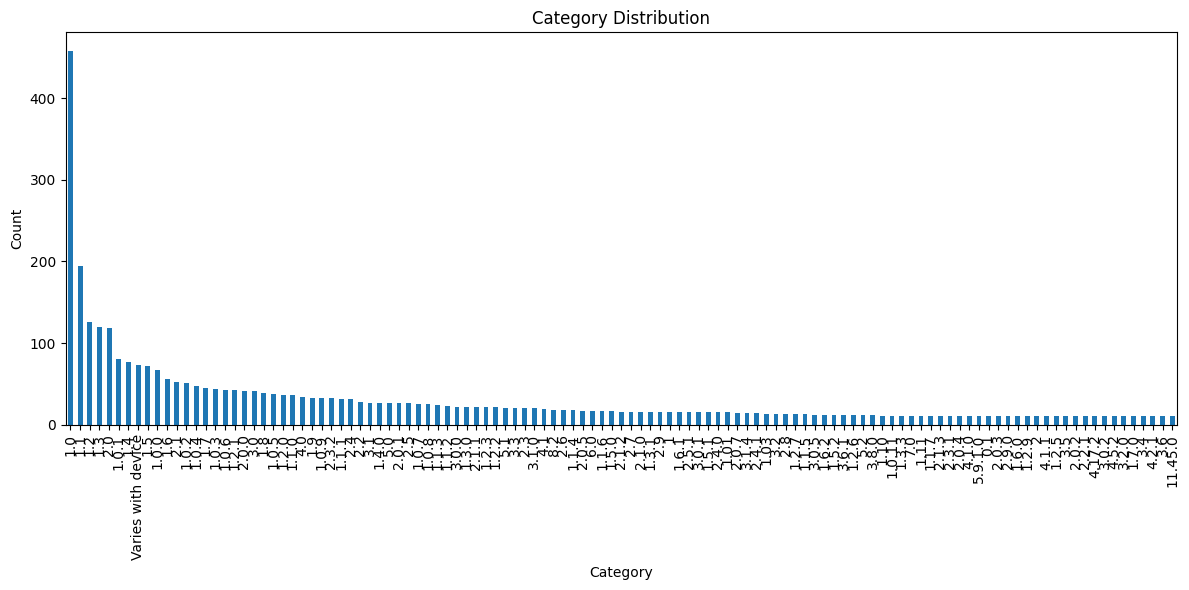

In [ ]:
filtered_current_counts = current_counts[current_counts >= 10]


# Create a bar graph
plt.figure(figsize=(12, 6))  # Set the size of the figure
filtered_current_counts.plot(kind='bar')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed

plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()

  

*   Counts more than 100



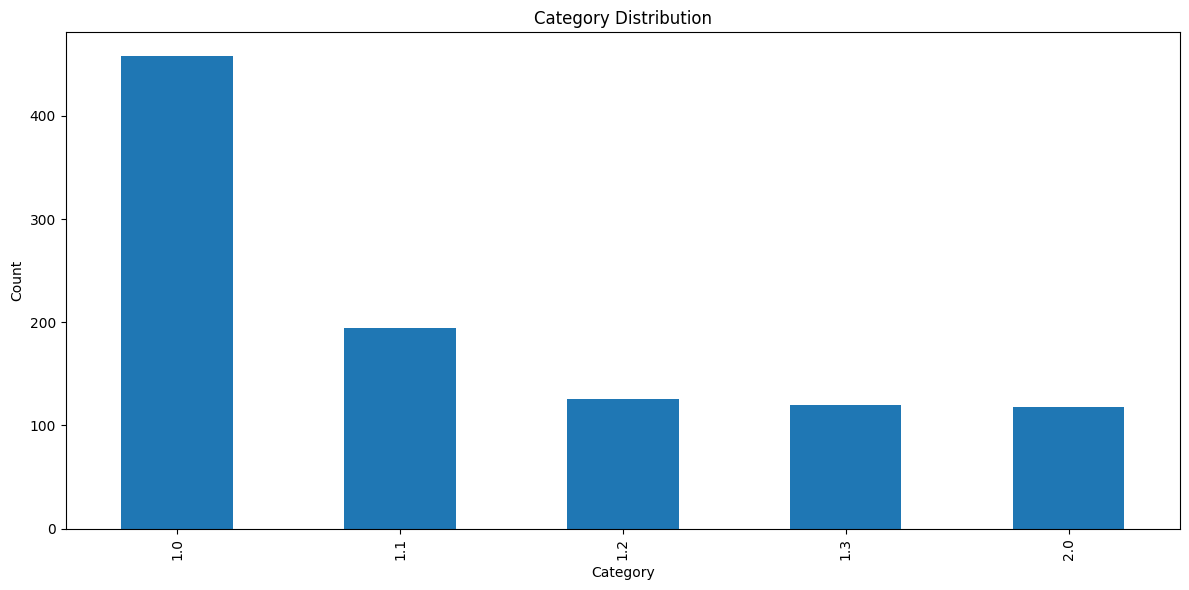

In [ ]:
filtered_current_counts = current_counts[current_counts >= 100]


# Create a bar graph
plt.figure(figsize=(12, 6))  # Set the size of the figure
filtered_current_counts.plot(kind='bar')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed

plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()



---


Android Version



*   Counts more than 10




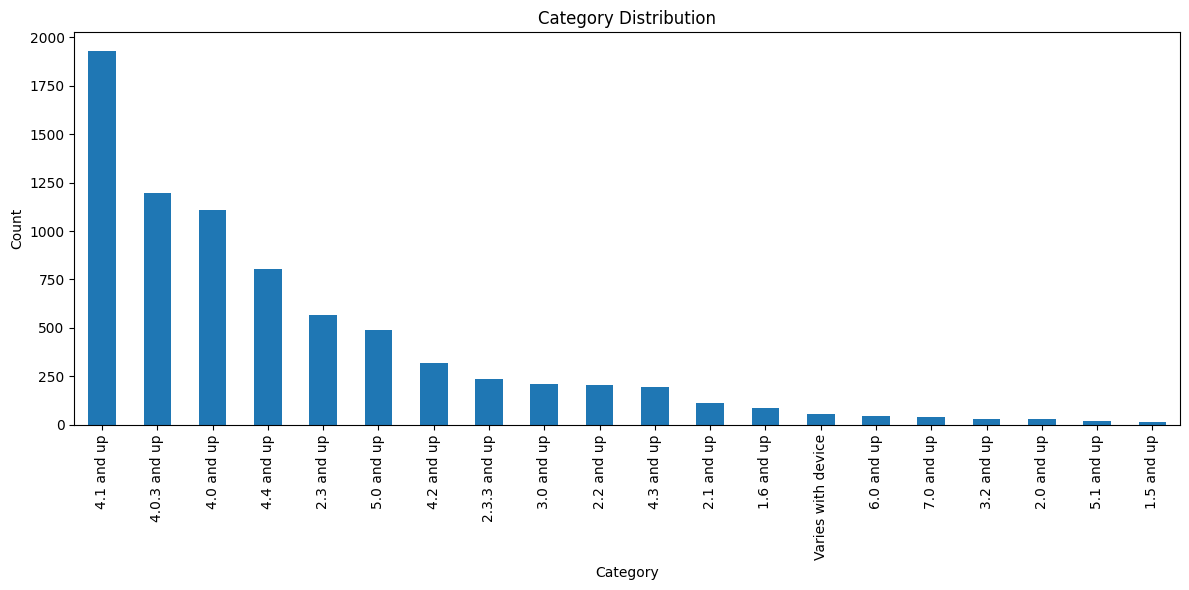

In [ ]:
filtered_android_counts = android_counts[android_counts >= 10]


# Create a bar graph
plt.figure(figsize=(12, 6))  # Set the size of the figure
filtered_android_counts.plot(kind='bar')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed

plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()



*   Counts more than 100



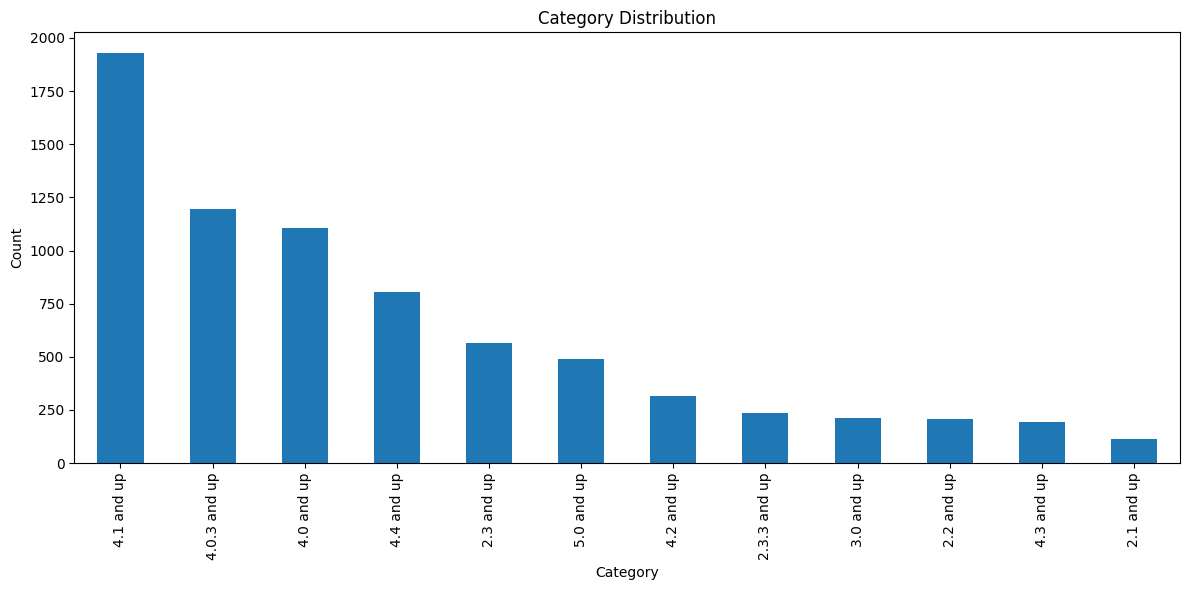

In [ ]:
filtered_android_counts = android_counts[android_counts >= 100]


# Create a bar graph
plt.figure(figsize=(12, 6))  # Set the size of the figure
filtered_android_counts.plot(kind='bar')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed

plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()